**Name: Yutika Rege**

**PRN: 1901202012**

**School: Data Science**

**Program: B.Sc. Data Science**

**Year/Semester: 2nd / 4th**

**Subject Name: Machine Learning 2**

**Subject Code: DS401**

**Aim/Objective:** Predict the survival rate of passengers using Naïve Bayes algorithm.

**Apparatus/ Tools/Equipment/ Resources used:** Jupyter notebook, Lecture notes, Python and Machine Learning books, online resources from Google, dataset, Google Meet.

**Concept/Theory of Experiments:** 

1.	Exploratory data analysis.

2.	Naïve Bayes algorithm.

**Procedure:** 

1.	Import the essential libraries.

2.	Perform EDA on the Titanic dataset. 

3.  Split the target feature from the independent feature.

4.  Train the data.

4.  Note the output.

**Observations/Calculation/Result:** In the Jupyter Notebook.

**Conclusion:** The Titanic data was trained using Naïve Bayes model and was used to predict if the passenger survived or not.

-------------------------------------------------------------------------------------------------------------------------------

**Importing essential libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [2]:
survivors = sns.load_dataset('titanic')
survivors.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Exlporatory Data Analysis:**

In [3]:
print(f"Rows   : {survivors.shape[0]}\nColumns: {survivors.shape[1]}")

Rows   : 891
Columns: 15


In [4]:
survivors.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
survivors.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
survivors.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
survivors.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

**Comment:** There are 891 rows and 15 columns those of which are survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town','alive' and 'alone'. There are a few missing values but only in the variables 'age','deck' and 'embark_town'. We will treat those later. Except 'embarked', 'class', 'who', 'adult_male','deck' and 'alone', all variables are numeric.

**Checking relevance of these variables:**

In [8]:
# checking for similar type of variables:

sim_cols_gender=survivors[["who","adult_male"]]
sim_cols_gender.head(4)

,who,adult_male
0,man,True
1,woman,False
2,woman,False
3,woman,False


The variable 'who' tells us if the passenger was a woman, a man or a child. The other variable 'adult_male' is a boolean variable denoting the same. It would be appropriate to drop it later.

In [9]:
del sim_cols_gender

In [10]:
survivors["deck"].value_counts().sum()

203

In [11]:
survivors["deck"].isnull().sum()

688

Since there are more null values in the variable "deck" than there are in non-null entries, it would be better to drop the entire column as a whole than to impute/drop only the null values.

In [12]:
survivors["embark_town"].isnull().sum()

2

In [13]:
survivors["age"].isnull().sum()

177

For the variables 'embark_town' and 'age', there are very few missing values which can be treated easily by either dropping or by imputation.

In [14]:
survivors["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [15]:
survivors["who"].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [16]:
pd.crosstab(survivors["who"],survivors["class"])

class,First,Second,Third
who,,,
child,6,19,58
man,119,99,319
woman,91,66,114


In [17]:
survivors.groupby("class")[["fare"]].agg("median")

,fare
class,
First,60.2875
Second,14.2500
Third,8.0500


**Comment:** It can be seen that most of the people were third class passengers and the median fare for them was £ 8.05 and while the strength of first class passengers was the least, the median fare for them was £ 60.3 .

**Visual EDA:**

**Plot-1: Distribution of passengers as per class**

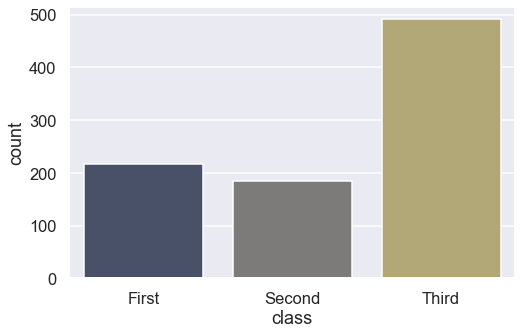

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(data=survivors,x="class",palette="cividis")

**Plot-2: Distribution of survivors factored by the variable 'who'**

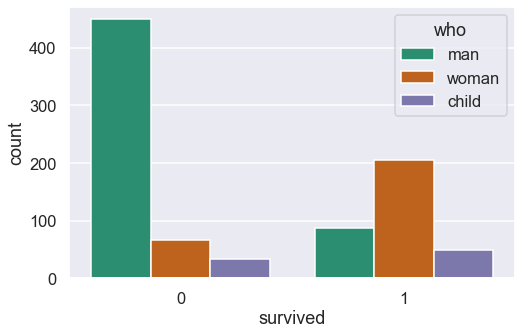

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=survivors,x="survived",hue="who",palette="Dark2")

**Plot-3: Checking for survivors as per the who they were, factored by class**

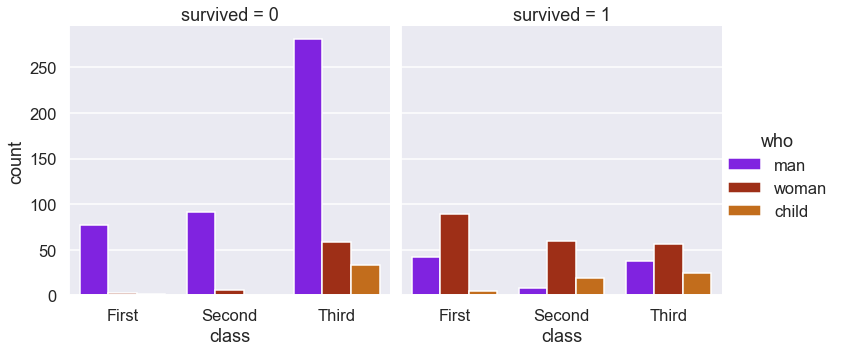

In [20]:
sns.catplot(x="class",hue="who",col="survived",data=survivors,kind="count",palette="gnuplot");

**Plot-4: Survivors factored by whether they were alone or not**

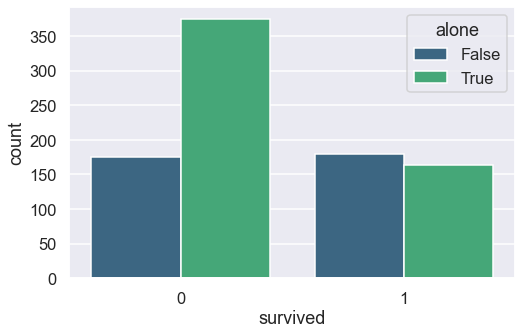

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data=survivors,x="survived",hue="alone",palette="viridis")

**Plot-5: Age vs. Passenge class:**

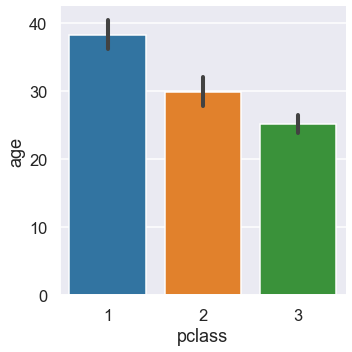

In [30]:
sns.catplot(data=survivors,x="pclass",y="age",kind="bar")

**Comments:** 

* Most of the passengers belonged to the third class category followed by first class and then second class. Only the children of the third class didn't survive.

* In the survived column, the maximum non-surviving passengers were men, followed by women and very less children didn't survive. Among the passengers that did survive, the former order naturally reverses. It can be seen in both the comparative plots that there are lesser women than men and even lesser children as compared to adults (men and women).

* To get further insights into the survivors data a multivariate countplot was produced, from which it is evident that the maximum men boarding via the third class type ticket didn't survive. It seems like women of the first class were among the passengers who survived the most (count-wise).

* Passengers who were travelling alone were more likely to not survive than those who were not travelling alone. There also seems to be a correlation between age and the passenger class i.e., there were more younger people travelling via the 3rd class.  

**Feature engineering:**

In [21]:
survivors.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [23]:
survivors_new = survivors.drop(["deck","embark_town","adult_male","alive","class","embarked"],axis=1)
survivors_new.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,who,alone
0,0,3,male,22.0,1,0,7.2500,man,False
1,1,1,female,38.0,1,0,71.2833,woman,False
2,1,3,female,26.0,0,0,7.9250,woman,True
3,1,1,female,35.0,1,0,53.1000,woman,False


* Encoding categorical variables:

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

survivors_new["sex"] = le.fit_transform(survivors_new["sex"])
survivors_new["who"] = le.fit_transform(survivors_new["who"])
survivors_new["alone"] = le.fit_transform(survivors_new["alone"])

In [26]:
survivors_new.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,who,alone
0,0,3,1,22.0,1,0,7.2500,1,0
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,0


**Corresponding encodings:**

1) Sex: 

        1 - Male
        
        0 - Female
        
2) Who:

        0 - Child
        
        1 - Man
        
        2 - Woman
        
3) Alone:

        0 - False
        
        1 - True

In [29]:
survivors_new.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
who           0
alone         0
dtype: int64

It would not be appropriate to drop the age column because it is an important feature to predict if the passenger survived or not. Thus, it must be imputed. For this, we will use the pclass variable.

In [32]:
survivors_new.groupby("pclass")[["age"]].agg("median")

,age
pclass,
1,37.0
2,29.0
3,24.0


In [33]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    
    else:
        return age
    

survivors_new["age"]=survivors_new[["age","pclass"]].apply(impute_age,axis=1)

In [34]:
survivors_new.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
who         0
alone       0
dtype: int64

The missing values in the age variable have been successfully imputed.

**Classification using Naïve Bayes algorithm:**

In [42]:
X = survivors_new.iloc[:,1:]
y = survivors_new.iloc[:,0]

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3)

In [52]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [60]:
y_pred_test = gnb.predict(X_test)

In [59]:
y_pred_train = gnb.predict(X_train)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

**Metrics of testing data:**

In [61]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       180
           1       0.77      0.75      0.76       117

    accuracy                           0.81       297
   macro avg       0.80      0.80      0.80       297
weighted avg       0.81      0.81      0.81       297



In [63]:
cmt = confusion_matrix(y_test,y_pred_test)
cm_test = pd.DataFrame(cmt,columns=['0','1'],index=['0','1'])
cm_test

,0,1
0,153,27
1,29,88


**Metrics of training data:**

In [62]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       369
           1       0.73      0.69      0.71       225

    accuracy                           0.79       594
   macro avg       0.77      0.77      0.77       594
weighted avg       0.78      0.79      0.78       594



In [64]:
cmt2 = confusion_matrix(y_train,y_pred_train)
cm_train = pd.DataFrame(cmt2,columns=['0','1'],index=['0','1'])
cm_train

,0,1
0,312,57
1,70,155


**Comment:** From the confusion matrix of the **test data**, it can be seen that the model correctly classified 88 'survived' and 153 'didn't survive' labels whereas missclassified 29 'didn't survive' and 27 'survived' labels. The accuracy of this model was 81 % on the test data and 79 % on the training data which means that the training data is generalising well on the test data since the two accuracy scores are very close. 

**Using Stratified CV to gain insights into the optimal accuracy:**

In [68]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits=10)
cv_score = cross_val_score(gnb,X,y,cv=skfold)
cv_score

array([0.77777778, 0.76404494, 0.78651685, 0.82022472, 0.79775281,
       0.79775281, 0.78651685, 0.7752809 , 0.79775281, 0.79775281])

In [69]:
print(f"Maximum accuracy:{round((cv_score).max(),2)}\nMinimum accuracy:{round((cv_score).min(),2)}\nMean accuracy:{round((cv_score).mean(),2)}")

Maximum accuracy:0.82
Minimum accuracy:0.76
Mean accuracy:0.79


**Comment:** It can be thus concluded that the maximum accuracy that can be achieved is 82 % while the minimum accuracy that can be achieved is 76 %.

**Predicting survival using new data points:**

In [72]:
X.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who', 'alone'], dtype='object')

Predicting for:

    pclass - 3 (third class)

    sex - 1 (Male)

    age - 20

    sibsp - 0 (no sibling or spouse)

    parch - 0 (no parent or child)

    fare -  £ 7

    who - 1 (Man)

    alone - 1 (alone/true)

In [75]:
gnb.predict([[3,1,20.0,0,0,7.00,1,1]])

array([0], dtype=int64)

**Comment:** The model has correctly predicted that the the passenger with the above mentioned credentials did not survive.